In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt  
import seaborn as sns

data = pd.read_csv('LoanDefaultData.csv')

In [2]:
data = data[['id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007']]
data.dtypes

id                int64
loan_default      int64
AP001             int64
AP002             int64
AP003             int64
                 ...   
CD170           float64
CD172           float64
CD173           float64
MB005           float64
MB007            object
Length: 87, dtype: object

In [3]:
# check which variables have NaNs and evaluate

columns = []
for i, val in enumerate(data.columns.tolist()):
    try:
        instance = [x for x in np.isnan(data[val]) if x is True]
#         print(val, set(instance), len(instance))
        if len(instance) < 1000:
            columns.append(val)
    except:
        columns.append(val)

data = data[columns]


In [4]:
data.dropna(inplace=True)
# going to drop the column that contains dates
data.drop(columns=['AP005'], inplace=True)
data.head()

,id,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,AP008,AP009,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB007
0,1,1,31,2,1,12,ios,3,3,1,...,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,IPHONE7
1,2,0,27,1,1,12,h5,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,WEB
2,3,0,33,1,4,12,h5,4,2,0,...,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,WEB
3,4,0,34,2,4,12,android,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OPPO
4,5,0,47,2,1,12,h5,4,4,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,WEB


In [5]:
print(set(data['AP006']))
print('-' * 100)
print(set(data['MB007']))

{'api', 'ios', 'h5', 'android'}
----------------------------------------------------------------------------------------------------
{'MLLED', 'EYU', 'TCT', 'GO', 'CMDC', 'MEIZU', 'CMCC', 'BOWAY', 'VOLTE', 'VOTO', 'HISENSE', 'NOKIA', 'HTC', 'SUGAR', 'IPAD5', 'DOOVL5PRO', 'Noinfo', 'FOPAD', 'MC-X7MINI', 'DOOV', 'MANN', 'LGE', 'GOOGLE', 'AND', 'CONGMETAL', 'HMI', 'F8926', 'OPPO', 'ALPS', 'SAMSUNG', 'IPOD7', '4G', 'IPAD3', 'MYTEL', 'SGMSGMS', 'VEGA', 'VETAS', 'ZUK', 'XIAOMI', 'BIFER', 'ASUS', 'AMOI', 'VERIZON', 'GIONEE', 'LINGWIN', 'IPHONE4', 'YU-FLY', 'NUBIA', 'LETV', 'SMARTISAN', 'CHANGHONG', 'HONOR', 'BOOWUN', 'TCL', 'HASEE', 'IPAD4', 'BEN13', 'YTONE_L985', 'HUAWEI', 'MOTOROLA', 'KOOBEE', 'SONY', 'ROAM_CAT', 'IPAD6', 'IPHONE8', 'SM-W2016', 'QIKU', 'MILAI', 'IPHONE7', 'IPHONE3', 'COOLPAD', 'IPHONE6', 'X6', 'WEB', 'OWWO', 'YUFLY', 'MONEYMAKINGMACHINE', 'IVVI', 'DAQ', 'OUKI', 'PHILIPS', 'UOOGOU', 'HONGLAJIAO', 'XIAOLAJIAO', 'KOPO', 'MEITU', 'VIVO', 'RAMOS', 'IPAD2', 'IPHONE5', 'REDGOO', '

In [6]:
data.corr()

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173
id,1.000000,0.000244,-0.003420,-0.001300,0.000395,-0.002802,0.001889,0.000042,-0.005756,0.002824,...,-0.009598,0.006823,0.005190,0.005527,0.002227,0.003118,0.001264,0.002264,0.000914,0.001850
loan_default,0.000244,1.000000,-0.026268,-0.037487,-0.086586,0.100043,0.039998,0.036266,-0.023583,0.089588,...,-0.011476,0.023244,0.020383,0.025351,0.025168,0.028222,0.027618,0.031212,0.027661,0.031027
AP001,-0.003420,-0.026268,1.000000,0.033887,-0.279219,0.050436,0.108613,0.089291,-0.012636,-0.159528,...,0.039323,0.006407,0.025396,0.016105,0.087220,0.077301,0.093035,0.083555,0.097324,0.088434
AP002,-0.001300,-0.037487,0.033887,1.000000,-0.044885,0.036380,0.048542,0.059440,0.032699,-0.015252,...,0.056772,0.001863,0.001448,0.004602,0.006086,0.010292,0.005794,0.008974,0.009184,0.012434
AP003,0.000395,-0.086586,-0.279219,-0.044885,1.000000,-0.019579,-0.077956,-0.064237,0.019016,0.163806,...,-0.004554,0.001123,-0.002570,0.000920,-0.008866,-0.003036,-0.008895,-0.002269,-0.011193,-0.004810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD167,0.003118,0.028222,0.077301,0.010292,-0.003036,-0.006743,-0.027688,-0.031389,0.012920,0.022582,...,0.097578,0.551694,0.559537,0.584326,0.956711,1.000000,0.854345,0.893548,0.800111,0.838262
CD169,0.001264,0.027618,0.093035,0.005794,-0.008895,-0.006106,-0.032038,-0.036945,0.013929,0.010545,...,0.112974,0.597479,0.688147,0.647994,0.899870,0.854345,1.000000,0.955929,0.956139,0.915819
CD170,0.002264,0.031212,0.083555,0.008974,-0.002269,-0.007737,-0.031294,-0.036432,0.015635,0.014069,...,0.107005,0.606593,0.627976,0.654038,0.862138,0.893548,0.955929,1.000000,0.909260,0.953021
CD172,0.000914,0.027661,0.097324,0.009184,-0.011193,-0.005961,-0.036372,-0.039395,0.016152,0.007830,...,0.114711,0.583771,0.714609,0.670982,0.847220,0.800111,0.956139,0.909260,1.000000,0.955441


In [7]:
columns = data.columns
prdf = data[[
    'loan_default',
    'AP001',
    'AP002',
    'AP003',
    'AP004',
    'AP007'
]]

# prdf = data[columns]

In [8]:

X = prdf.drop(columns=['loan_default'])
y = prdf['loan_default']

X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.3, random_state=123)

clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.52      0.65     19346
           1       0.24      0.64      0.35      4540

    accuracy                           0.54     23886
   macro avg       0.55      0.58      0.50     23886
weighted avg       0.74      0.54      0.59     23886



#### Logisitic Regression Testing
After running the data points through the logistic regression the first iteration results was very bad. Looking at the support from the from the classification report the data is not very balanced. To help solve for this I set the class weight = to 'balanced' to hel train the model more evenly. The f1 score still is very poor for thsi algorithm.

In [16]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    print(k)

1
2
3
4
5
6
7
8
9


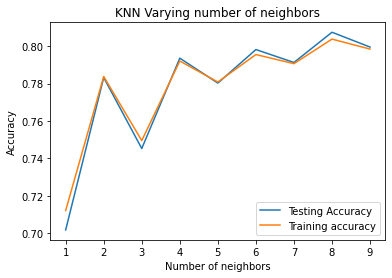

In [17]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### KNN Results
I test 1 to 9 neighbors to see which produce the most accurate results. From the chart above we can see that accuracy tops out with 8 neighbors at about 82%. This accuracy far out performs the results from Logistic Regression. We should also check the classification report to see how well precision and recall are in this case.

In [18]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     19346
           1       0.23      0.01      0.01      4540

    accuracy                           0.81     23886
   macro avg       0.52      0.50      0.45     23886
weighted avg       0.70      0.81      0.73     23886



The classification report gives us a much clearer picture of what is happening. We can see that precision is actually pretty bad here. It is about the same as Logistic Regression in terms of precision and recall. In reality accuracy is not the best metric for evaluating a model but it can depend on the goal of the model.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

X = data[['AP003', 'AP004', 'AP007', 'AP008', 'AP009']]
y = data['loan_default']

scaler = scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.3, random_state=123)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     19346
           1       0.00      0.00      0.00      4540

    accuracy                           0.81     23886
   macro avg       0.40      0.50      0.45     23886
weighted avg       0.66      0.81      0.72     23886



c:\users\andrew\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     19346
           1       0.33      0.00      0.00      4540

    accuracy                           0.81     23886
   macro avg       0.57      0.50      0.45     23886
weighted avg       0.72      0.81      0.73     23886



With Standardiztion of the variables we do get slightly better precision for the KNN model. The Naive Bayes algorithm performs very poorly in with the same variables and scaling.